# Task 1


These are my solutions to the Tasks assesments. The author is Eoin Lees (Enter Email)

----


#### Task: Calculate square root

We can calculate the square root of a number by using Newton's method. [1,2]

To find the square root of $z$ of a number $x$, we can iterate using the following equation. 

$$ z_{next} = z - \frac{z^2 - x}{2z} $$


# Explain how this works and reference



In [1]:
# A function to calculate the square root of number x
def sqrt(x):
    '''
    A function to calculate the square root of number x
    '''
    # Initial guess for square root z
    z = x / 2
    # Loop until accuracy is ok
    while abs(x - (z*z)) > 0.00001:
         z -= (z*z - x) / (2*z)
    # Return the approximate square root of x. 
    return z



##### Tests of the function

The function was tested with some known values. 

In [2]:
# Test the function on 100.
sqrt(100)

10.000000000107446

In [3]:
# Test the function on 2.
sqrt(2)

1.4142156862745099

In [1]:
# Test with imported function
import math
math.sqrt(2)

1.4142135623730951

## Markdown Cell - References

This is a markdown cell [1]

[1] Mastering Markdown; GitHub; https://guides.github.com/features/mastering-markdown/

[2] Python Tutorial; Python Software Foundation; https://docs.python.org/3/tutorial/controlflow.html#for-statements

[3] Methods of computing square roots; Wikipedia; https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[4] https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64

[5] A tour of go; Exercise: Loops and Functions; https://tour.golang.com/flowcontrol/8

[6] Newton's method; Wikipedia; https://en.wikipedia.org/wiki/Newton%27s_method

[7] https://www.mathjax.org/

[8] https://www.youtube.com/watch?v=ICXR9nDbudk&ab_channel=JieJenn]

[9] https://stackoverflow.com/questions/50355577/scraping-wikipedia-tables-with-python-selectively

-------
    

#### Task 2: Chi-squared test fo independence
-----------
November 2nd 2020

Include a short note with references justifying your analysis. scipy.stats
* what is it telling you
* Why are you giving it this input(these)
* How do you get the table into the correct format for scipy.stats


references 

https://www.youtube.com/watch?v=ICXR9nDbudk&ab_channel=JieJenn 

https://stackoverflow.com/questions/50355577/scraping-wikipedia-tables-with-python-selectively

https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451

##### Import table from wikipedia using beautiful soup

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


# [8] [9]
URL = "https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096"
table_class = "wikitable"

response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

chisqr = soup.find("table", class_=table_class)
df = pd.read_html(str(chisqr))
df = pd.DataFrame(df[0])

print(df)

     Unnamed: 0    A    B    C    D  total
0  White collar   90   60  104   95    349
1   Blue collar   30   50   51   20    151
2     No collar   30   40   45   35    150
3         Total  150  150  200  150    650


In [77]:
import numpy as np

import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")



KeyError: 0

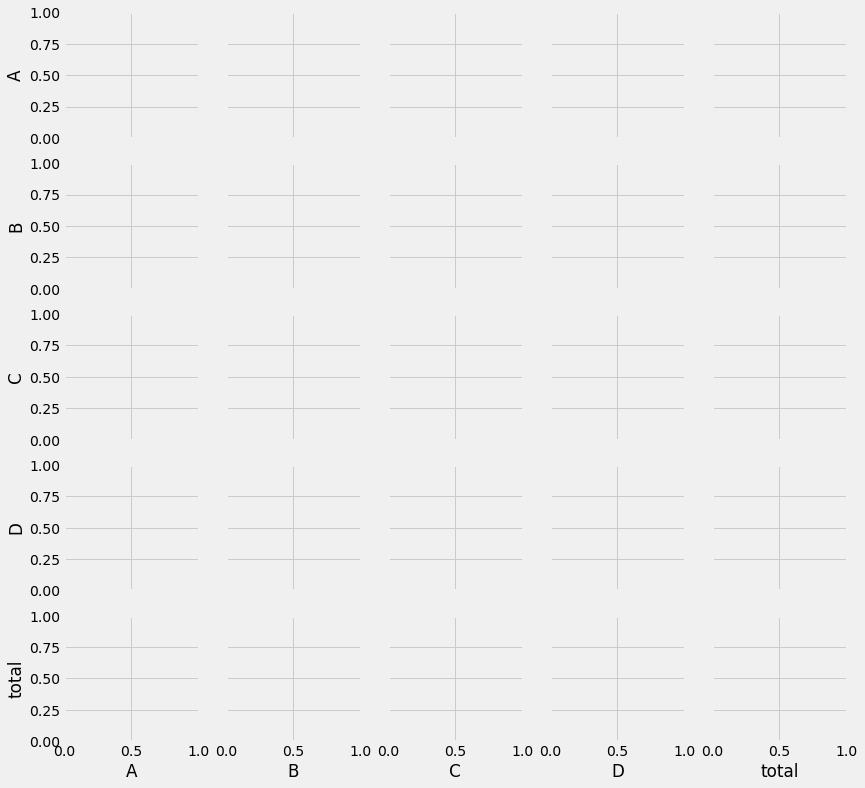

In [79]:
sns.pairplot(df, hue = 0)